In [84]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
vader=SentimentIntensityAnalyzer()

In [3]:
#for reference
text="I hate 🐈 "
vader.polarity_scores(text)

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

In [4]:
df=pd.read_csv("cleaned_data.csv")

In [27]:

f=lambda x:vader.polarity_scores(x)["pos"]
neu=lambda x:vader.polarity_scores(x)["neu"]
neg=lambda x:vader.polarity_scores(x)["neg"]
c=lambda x:vader.polarity_scores(x)["compound"]

In [12]:
weights = {"Review Summary" : 0.4, "Review Details" : 0.6}

In [18]:
df["Review Summary"].apply(f)

0      0.25944
1      0.25944
2      0.25944
3      0.25944
4      0.00000
        ...   
375    0.00000
376    0.00000
377    0.10864
378    0.10864
379    0.00000
Name: Review Summary, Length: 380, dtype: float64

In [10]:
#Percentage weightage
weights = {"Review Summary" : 0.4, "Review Details" : 0.6}

In [33]:
weighted_pos=df["Review Summary"].apply(f)*weights["Review Summary"]+df["Review Detail"].apply(f)*weights["Review Details"]

weighted_compound=df["Review Summary"].apply(c)*weights["Review Summary"]+df["Review Detail"].apply(c)*weights["Review Details"]

weighted_neg=df["Review Summary"].apply(neg)*weights["Review Summary"]+df["Review Detail"].apply(neg)*weights["Review Details"]

weighted_neu=df["Review Summary"].apply(neu)*weights["Review Summary"]+df["Review Detail"].apply(neu)*weights["Review Details"]

In [55]:
df["VADER_neg"]=weighted_neg
df["VADER_pos"]=weighted_pos
df["VADER_neu"]=weighted_neu
df["VADER_compound"]=weighted_compound


In [59]:
#checking for VADER_neg values
df.sort_values("VADER_neg").tail(3)

,Product name,Product price,Number of ratings,Number of reviews,Review Summary,Review Detail,VADER_neg,VADER_pos,VADER_neu,VADER_compound
250,Lenovo Legion 5 AMD Ryzen 5 Hexa Core 4600H - ...,SGD 936.0,10,8,Terrible Customer Service,This laptop is frustratingly slow. It struggle...,0.374,0.0642,0.5618,-0.44358
247,Lenovo Legion 5 AMD Ryzen 5 Hexa Core 4600H - ...,SGD 936.0,10,8,Poor Screen Quality,This laptop is frustratingly slow. It struggle...,0.374,0.0642,0.5618,-0.44358
144,Lenovo Legion 5 AMD AMD Ryzen 7 Octa Core 5800...,SGD 1576.0,88,18,Very poor,"Very powerful gaming machine, but I highly rec...",0.376,0.1104,0.5142,0.17418


In [82]:
# 7 unique name/model
df["Product name"].nunique()

7

Text(0.5, 1.0, 'Sentiment Analysis on the different models')

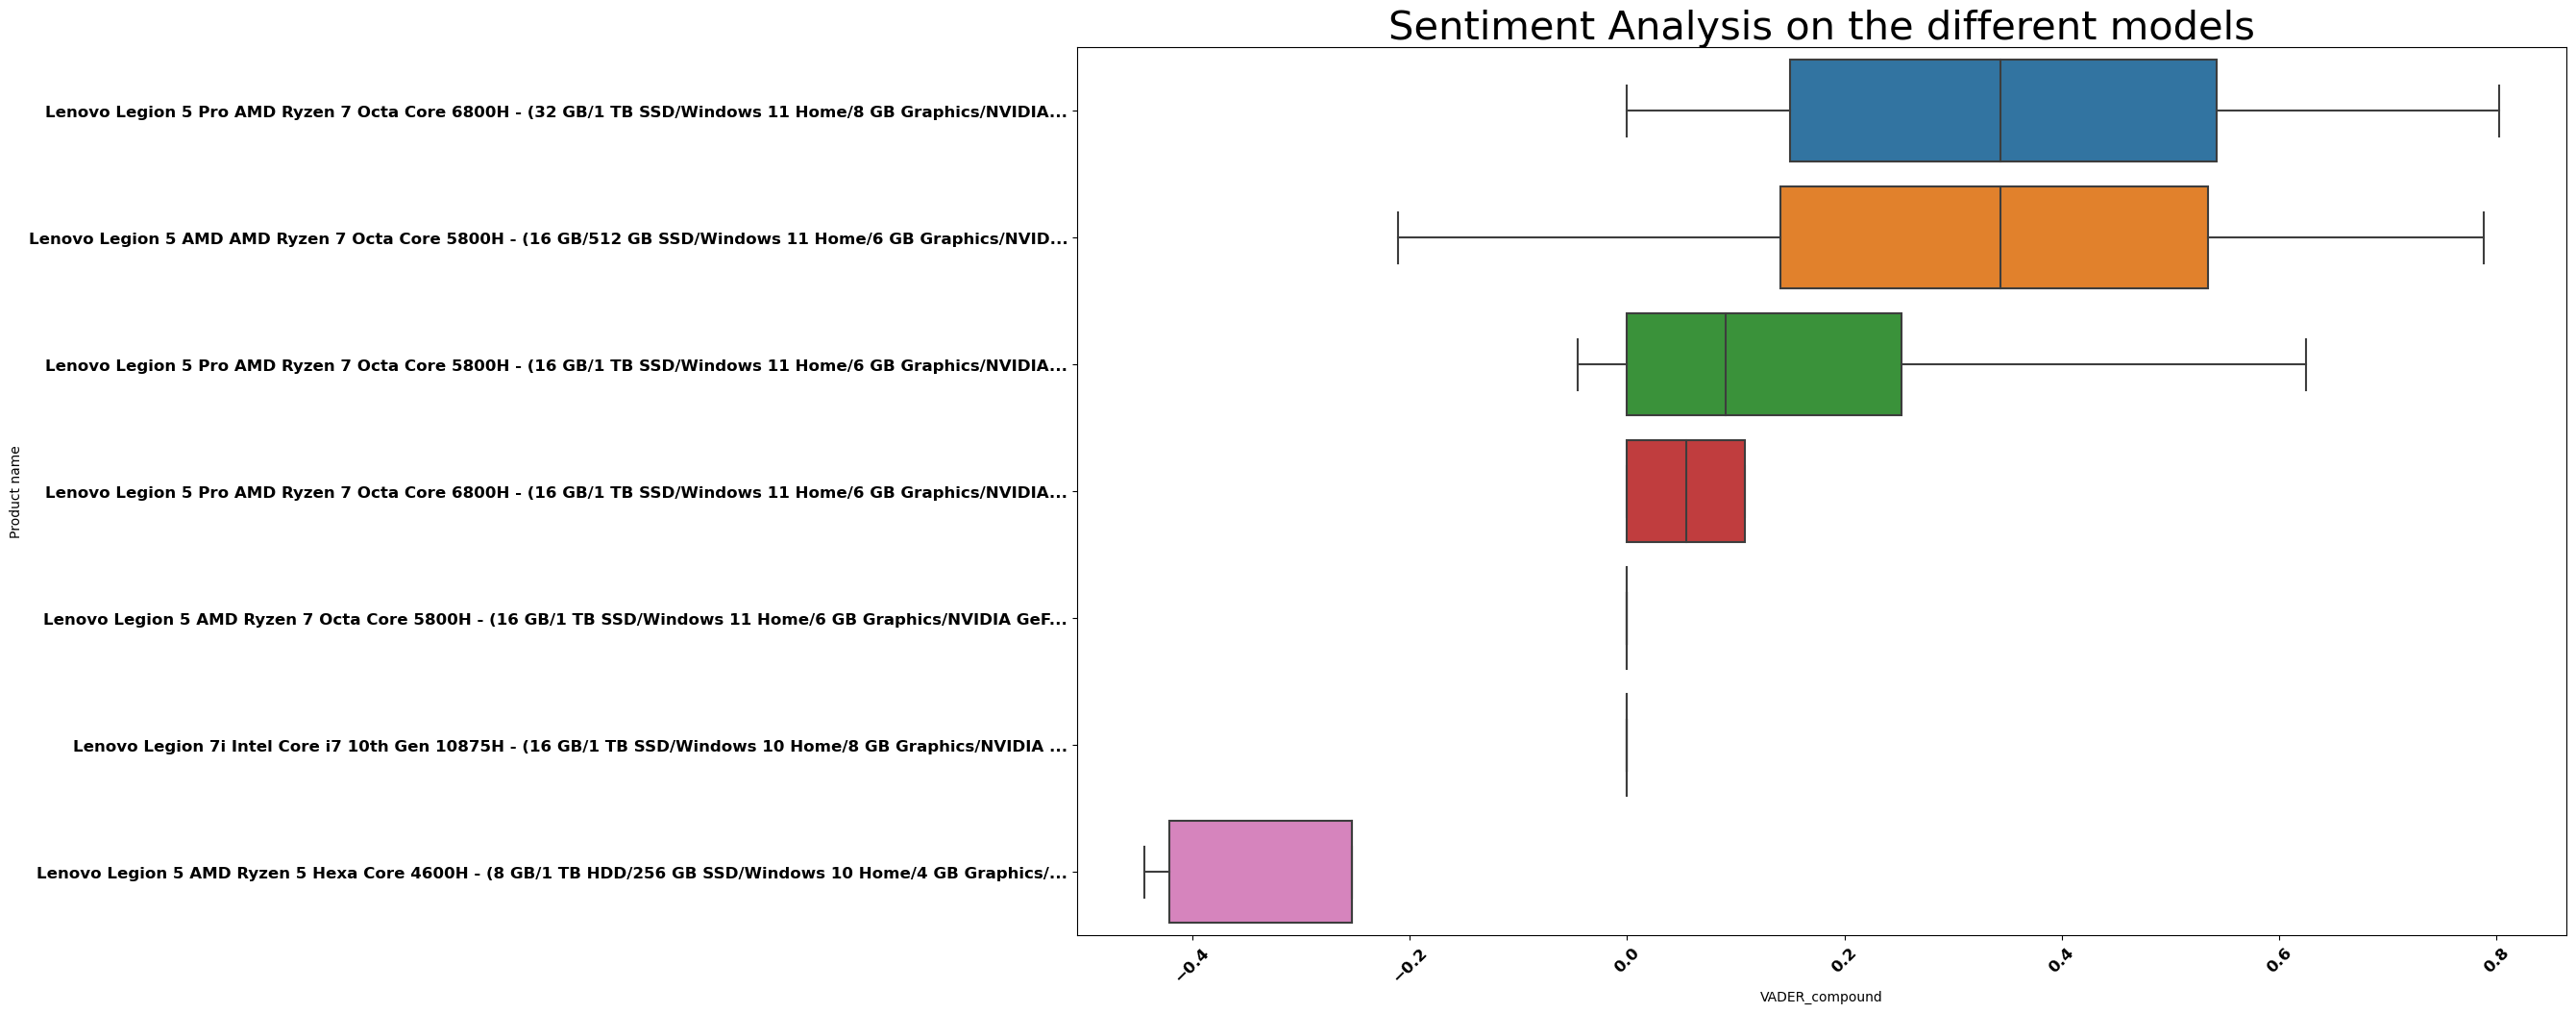

In [106]:
#Box Plot of VADER compound scores
newdf=df.sort_values("VADER_compound",ascending=False)
plt.figure(figsize=(20,12))
sns.boxplot(newdf, x='VADER_compound', y='Product name')  
plt.yticks(weight="bold",fontsize=12)
plt.xticks(weight="bold",rotation=45,fontsize=12)
plt.title("Sentiment Analysis on the different models",fontsize=30)

In [80]:
newdf["Product name"].nunique()

7